In [1]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge

import warnings

warnings.filterwarnings('ignore')

#### Importing dataset

In [2]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

df.info() suggests that there are currently 80 columns in tha dataset, and that there are columns with non integer values, so we may need to convert a few columns to float depending on usecase

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Out of the 81 columns, there are certain columns whose non null values are very less compared to total data size of ~1500 ... lets assume the threashold is 500
Columns having non null count < 500 are PoolQC, Fence, MiscFeature, Alley ... lets drop these columns


#### removing columns with more than 50% null values

In [4]:
df = df.loc[:, df.isnull().mean() < .5]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### removing columns with high correlation

In [5]:
# get df having only numeric columns
df_numeric = df.select_dtypes(include=[np.number])
# Create correlation matrix
corr_matrix = df_numeric.corr().abs()
# finding the columns which have correlation more than 0.7
for column in corr_matrix:
    corr_matrix[column] = corr_matrix[column].apply(lambda x: 1 if x > 0.7 else 0)
corr_matrix.head()




,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MSSubClass,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LotFrontage,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LotArea,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OverallQual,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
# list columns which have correlation more than 0.7 but don't remove SalePrice
columns_to_be_removed = []
for column in corr_matrix:
    if corr_matrix[column].sum() > 1:
        columns_to_be_removed.append(column)
columns_to_be_removed.remove('SalePrice')
# add Id column
columns_to_be_removed.append('Id')
columns_to_be_removed

['OverallQual',
 'YearBuilt',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'Id']

In [7]:
# drop columns which have correlation more than 0.7
df = df.drop(columns_to_be_removed, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallCond    1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [8]:
categorical_variables = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
                         'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
                         'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
                         'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                         'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
                         'GarageQual', 'PavedDrive', 'SaleType', 'SaleCondition', 'GarageCond']


def get_labels_df(passed_dataframe):
    df_to_be_returned = pd.DataFrame()
    for categorical_variable in categorical_variables:
        df_to_be_returned = pd.concat(
            [df_to_be_returned, pd.get_dummies(passed_dataframe[categorical_variable], drop_first=True)], axis=1)
    #         print(pd.get_dummies(passed_dataframe[categorical_variable]).info())
    return df_to_be_returned


labels_df = get_labels_df(df)
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 197 entries, FV to TA
dtypes: bool(197)
memory usage: 281.0 KB


In [9]:
combined_df = pd.concat([df, labels_df], axis=1)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 263 entries, MSSubClass to TA
dtypes: bool(197), float64(2), int64(26), object(38)
memory usage: 1.0+ MB


dropping redundant columns (whose dummy variables are created)

In [10]:
for categorical_variable in categorical_variables:
    combined_df.drop([categorical_variable], axis=1, inplace=True)

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 225 entries, MSSubClass to TA
dtypes: bool(197), float64(2), int64(26)
memory usage: 600.4 KB


In [11]:
combined_df = combined_df.dropna()
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1195 entries, 0 to 1459
Columns: 225 entries, MSSubClass to TA
dtypes: bool(197), float64(2), int64(26)
memory usage: 500.6 KB


In [12]:
# remove duplicate columns
combined_df = combined_df.loc[:, ~combined_df.columns.duplicated()]
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1195 entries, 0 to 1459
Columns: 167 entries, MSSubClass to Partial
dtypes: bool(139), float64(2), int64(26)
memory usage: 433.0 KB


In [13]:
## remove noise and outliers
# iterate through all numeric columns and remove outliers, remove on basis of standard deviation
for column in combined_df.columns:
    if combined_df[column].dtype != 'object':
        combined_df = combined_df[np.abs(combined_df[column] - combined_df[column].mean()) <= (5 * combined_df[column].std())]
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 463 entries, 0 to 1454
Columns: 167 entries, MSSubClass to Partial
dtypes: bool(139), float64(2), int64(26)
memory usage: 167.7 KB


Getting dummies of categorical variables

#### Now we have converted the data from labels to dummy vars values... data preparation is done

In [14]:
# seeing head values
combined_df.head()

,MSSubClass,LotFrontage,LotArea,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,5,2003,196.0,706,0,150,854,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,5,2002,162.0,486,0,434,866,...,False,False,False,False,True,False,False,False,True,False
6,20,75.0,10084,5,2005,186.0,1369,0,317,0,...,False,False,False,False,True,False,False,False,True,False
10,20,70.0,11200,5,1965,0.0,906,0,134,0,...,False,False,False,False,True,False,False,False,True,False
13,20,91.0,10652,5,2007,306.0,0,0,1494,0,...,False,False,True,False,False,False,False,False,False,True


In [27]:
# convert true false to 1 and 0
combined_df = combined_df * 1
combined_df.head()

,MSSubClass,LotFrontage,LotArea,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,5,2003,196.0,706,0,150,854,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,5,2002,162.0,486,0,434,866,...,0,0,0,0,1,0,0,0,1,0
6,20,75.0,10084,5,2005,186.0,1369,0,317,0,...,0,0,0,0,1,0,0,0,1,0
10,20,70.0,11200,5,1965,0.0,906,0,134,0,...,0,0,0,0,1,0,0,0,1,0
13,20,91.0,10652,5,2007,306.0,0,0,1494,0,...,0,0,1,0,0,0,0,0,0,1


#### Building model  

In [16]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(combined_df,
                                     train_size=0.7,
                                     test_size=0.3,
                                     random_state=100)

In [17]:
# rescale the features
scaler = MinMaxScaler()
df_train = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)
df_train.head()


,MSSubClass,LotFrontage,LotArea,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,0.000000,0.324561,0.356344,0.2,0.866667,0.119306,0.445954,0.0,0.336045,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.214286,0.263158,0.390323,0.4,0.516667,0.000000,0.000000,0.0,0.188356,0.402349,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.285714,0.394737,0.312903,0.2,0.933333,0.000000,0.000000,0.0,0.465753,0.639501,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.394737,0.365914,0.2,0.950000,0.464208,0.000000,0.0,0.768408,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.714286,0.333333,0.249462,0.2,0.950000,0.392625,0.000000,0.0,0.800086,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
1255,50,52.0,6240,6,1950,0.0,425,0,459,408,...,0,0,0,0,1,0,0,0,1,0
1331,80,55.0,10780,5,1976,0.0,483,0,428,0,...,0,0,0,0,1,0,0,0,1,0
982,20,43.0,3182,5,2007,16.0,0,0,1266,0,...,0,0,0,0,1,0,0,0,1,0
765,20,75.0,14587,5,2008,284.0,0,0,1498,0,...,0,0,1,0,0,0,0,0,0,1
270,60,84.0,10728,5,2006,0.0,0,0,1095,844,...,0,0,1,0,0,0,0,0,0,1


In [19]:
df_train['SalePrice']

0      0.331295
1      0.092762
2      0.418960
3      0.168196
4      0.516944
         ...   
319    0.264016
320    0.142712
321    0.111519
322    0.582059
323    0.143323
Name: SalePrice, Length: 324, dtype: float64

In [20]:
# divide into X_train, y_train, X_test, y_test
X_train = df_train

X_test = df_test
X_test = pd.DataFrame(scaler.transform(X_test), columns=df_test.columns)
y_train = df_train.pop('SalePrice')
y_test = X_test.pop('SalePrice')

Using RFE
Now, we have 208 predictor features. To build the model using RFE, we need to tell RFE how many features we want in the final model. It then runs a feature elimination algorithm.

Note that the number of features to be used in the model is a hyperparameter.

In [21]:
# first model with an arbitrary choice of n_features
# running RFE with number of features=15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)


In [22]:
# predict prices of X_test
y_pred = rfe.predict(X_test)
# scale y_test

# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.8213757763020196


In [23]:
# show the parameters selected by rfe method
all_params = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
selected_params = []
for param in all_params:
    if param[1] == True:
        selected_params.append(param)
selected_params.sort(key=lambda x: x[2])
selected_params

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('FullBath', True, 1),
 ('KitchenAbvGr', True, 1),
 ('RL', True, 1),
 ('NridgHt', True, 1),
 ('OldTown', True, 1),
 ('Gd', True, 1),
 ('TA', True, 1)]

In [24]:
# intercept and coefficients through rfe
print(rfe.estimator_.intercept_)
print(rfe.estimator_.coef_)

0.11349867389988008
[ 0.08188484  0.05831449  0.04374621  0.33492085  0.09519002  0.29984899
  0.13007814 -0.08999699  0.1194155  -0.14503805 -0.05061172  0.10442559
 -0.0364257  -0.09672034 -0.13799547]


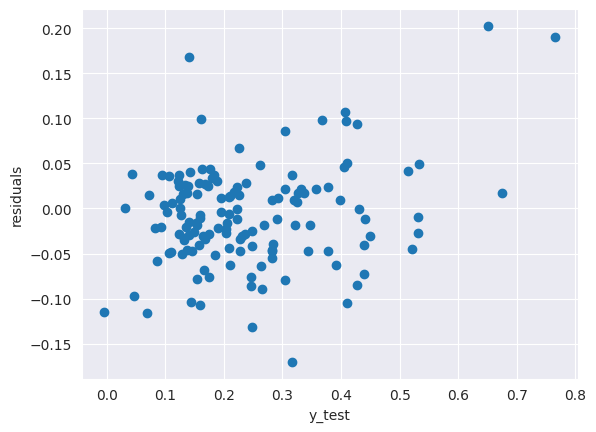

In [25]:
# scatter plot or residuals
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel('y_test')
plt.ylabel('residuals')
plt.show()



TypeError: 'Text' object is not callable

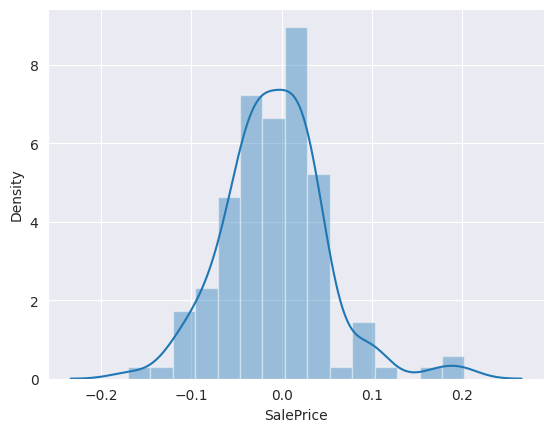

In [28]:
# residual analysis histogram
residuals = y_test - y_pred
hist_plt = sns.distplot(residuals)
hist_plt = hist_plt.title('Residual Analysis histogram')
hist_plt = hist_plt.xlabel('Residuals')
hist_plt = hist_plt.ylabel('Frequency')
hist_plt.show()


residual histogram is almost making a normal distribution, but there is a slight bump at around 0.27 Sale price as well... 
in the scatter plot as well, we see that As y_test value increased, the variance slightly increased as well. However, when we see mean of residuals, it is very close to 0,
 so we can say that the model is fine. But we need to check further by model validation

#### Linear Regression Model Estimates using Matrix Multiplications

In [29]:
# Metrics to give an overall sense of error in the model
rss = np.sum(np.square(residuals))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

0.4504889782064698
0.00324092790076597
0.056929148076938316


#### polynomial regression
The linear model is giving satisfactory results. Let's try improving on it using a non-linear model. I will first try polynomial regression with degree = 3.

In [30]:
# polynomial regression
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
linear_poly = LinearRegression()
linear_poly.fit(X_train_poly, y_train)


LinearRegression()

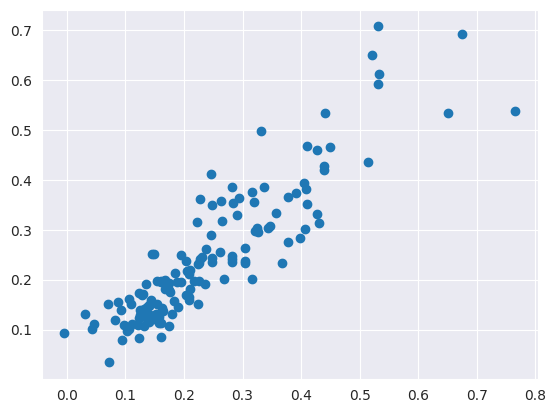

In [31]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
y_pred_poly = linear_poly.predict(X_test_poly)
plt.scatter(y_test, y_pred_poly)

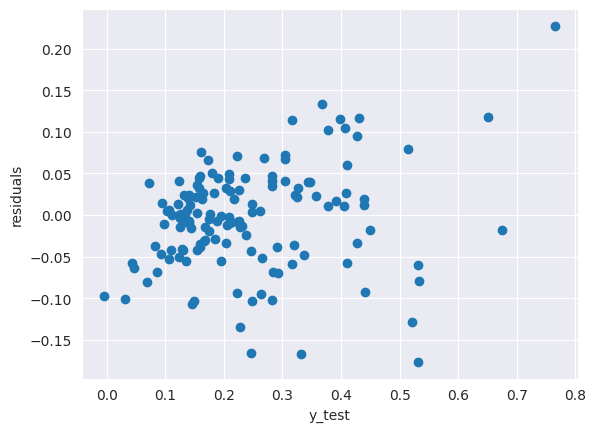

In [32]:
# scatter plot or   residuals
residuals_poly = y_test - y_pred_poly
plt.scatter(y_test, residuals_poly)
plt.xlabel('y_test')
plt.ylabel('residuals')
plt.show()

TypeError: 'Text' object is not callable

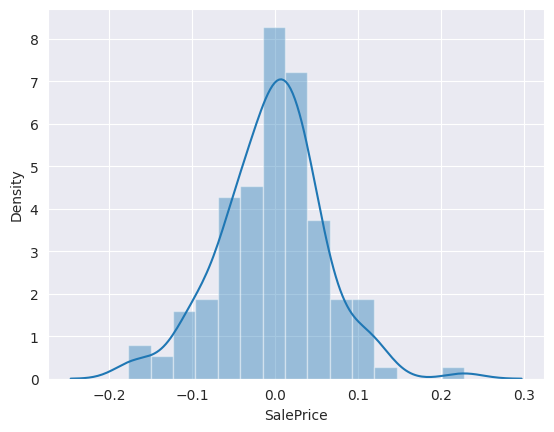

In [33]:
# residual analysis histogram
residuals_poly = y_test - y_pred_poly
hist_plt = sns.distplot(residuals_poly)
hist_plt = hist_plt.title('Residual Analysis histogram')
hist_plt = hist_plt.xlabel('Residuals')
hist_plt = hist_plt.ylabel('Frequency')
hist_plt.show()

In [34]:
# Metrics to give an overall sense of error in the model
rss_poly = np.sum(np.square(residuals_poly))
print(rss_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(mse_poly)
rmse_poly = mse_poly**0.5
print(rmse_poly)
### with degree 1 linear regression the values were
#0.4504889782064698
#0.00324092790076597
#0.056929148076938316

0.5340372228634512
0.0038419944090895774
0.06198382376950923


 It seems degree 3 has increased the errors. So Will try with degree 2


In [35]:
# polynomial regression degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly_deg2 = poly.fit_transform(X_train)
X_test_poly_deg2 = poly.transform(X_test)
linear_poly_deg2 = LinearRegression()
linear_poly_deg2.fit(X_train_poly_deg2, y_train)


LinearRegression()

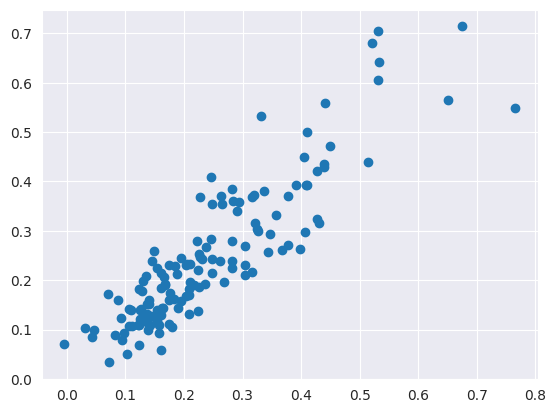

In [36]:
# plotting y_test and y_pred to understand the spread
fig_deg2 = plt.figure()
y_pred_poly_deg2 = linear_poly_deg2.predict(X_test_poly_deg2)
plt.scatter(y_test, y_pred_poly_deg2)
plt.show()

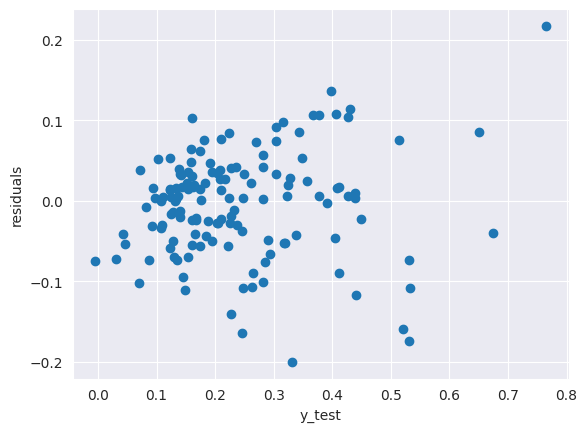

In [37]:
# scatter plot of  residuals
residuals_poly_deg2 = y_test - y_pred_poly_deg2
plt.scatter(y_test, residuals_poly_deg2)
plt.xlabel('y_test')
plt.ylabel('residuals')
plt.show()


TypeError: 'Text' object is not callable

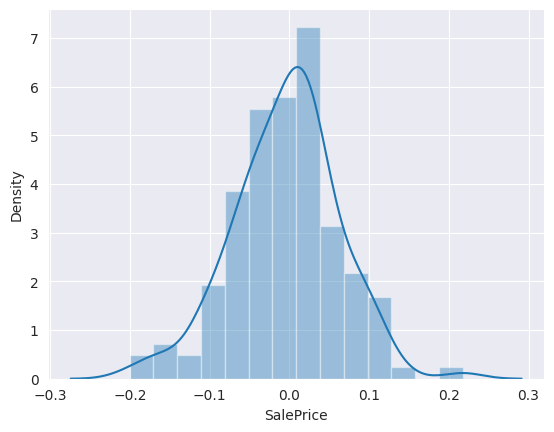

In [38]:
# residual analysis histogram
residuals_poly_deg2 = y_test - y_pred_poly_deg2
hist_plt = sns.distplot(residuals_poly_deg2)
hist_plt = hist_plt.title('Residual Analysis histogram')
hist_plt = hist_plt.xlabel('Residuals')
hist_plt = hist_plt.ylabel('Frequency')
hist_plt.show()

In [39]:
# Metrics to give an overall sense of error in the model
rss_poly_deg2 = np.sum(np.square(residuals_poly_deg2))
print(rss_poly_deg2)
mse_poly_deg2 = mean_squared_error(y_test, y_pred_poly_deg2)
print(mse_poly_deg2)
rmse_poly_deg2 = mse_poly_deg2**0.5
print(rmse_poly_deg2)
### with degree 1 linear regression the values were
#0.4504889782064698
#0.00324092790076597
#0.056929148076938316

0.6026418605990149
0.004335552953949748
0.06584491593091868


It seems out of degree 1, 2 and 3, lowest error is with degree 1, so will use degree 1

In [41]:
# applying ridge regression
# values to be considered for predictor variables
X_seq_ridge = X_train
lambdas = [0, 0.01, 0.05, 0.5, 5, 10, 20, 50, 100]
for i in lambdas:
    ridge = Ridge(alpha=i)
    ridge.fit(X_seq_ridge, y_train)
    y_pred_ridge = ridge.predict(X_test)
    r2_ridge = sklearn.metrics.r2_score(y_test, y_pred_ridge)
    print('r2 score for lambda = ', i, ' is ', r2_ridge)

r2 score for lambda =  0  is  0.8491502612943076
r2 score for lambda =  0.01  is  0.8665502764561444
r2 score for lambda =  0.05  is  0.866861780904302
r2 score for lambda =  0.5  is  0.8659622254164363
r2 score for lambda =  5  is  0.8505768076486934
r2 score for lambda =  10  is  0.8414883532379027
r2 score for lambda =  20  is  0.8267686051626852
r2 score for lambda =  50  is  0.7878821832854348
r2 score for lambda =  100  is  0.7339452867035714


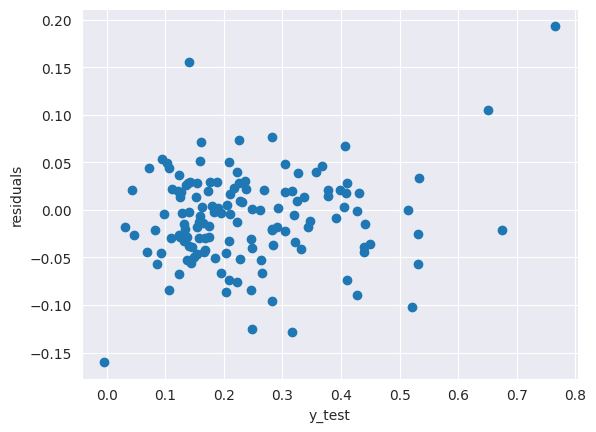

In [45]:
# r2 score is max when lambda = 0.05, so will plot with predicted values of lambda = 0.05
# scatter plot of  residuals
ridge = Ridge(alpha=0.05)
ridge.fit(X_seq_ridge, y_train)
y_pred_ridge_for_plot = ridge.predict(X_test)
r2_ridge = sklearn.metrics.r2_score(y_test, y_pred_ridge_for_plot)

residuals_ridge_for_plot = y_test - y_pred_ridge_for_plot
plt.scatter(y_test, residuals_ridge_for_plot)
plt.xlabel('y_test')
plt.ylabel('residuals')
plt.show()


TypeError: 'Text' object is not callable

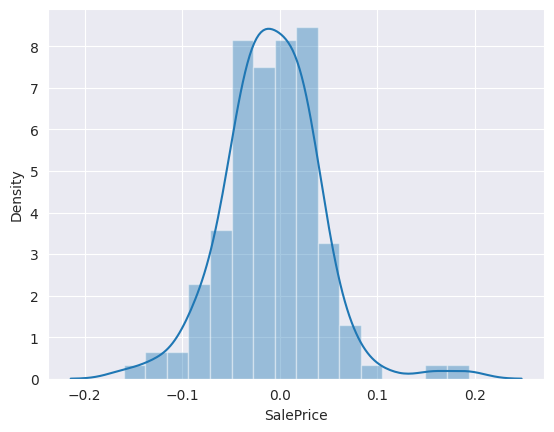

In [46]:
# residual analysis histogram
residuals_ridge_for_plot = y_test - y_pred_ridge_for_plot
hist_plt = sns.distplot(residuals_ridge_for_plot)
hist_plt = hist_plt.title('Residual Analysis histogram')
hist_plt = hist_plt.xlabel('Residuals')
hist_plt = hist_plt.ylabel('Frequency')
hist_plt.show()

#### Lasso Regression

In [42]:
# applying lasso regression
# values to be considered for predictor variables
X_seq_lasso = X_train
lambdas = [0, 0.01, 0.05, 0.5, 5, 10, 20, 50, 100]
for i in lambdas:
    lasso = Lasso(alpha=i)
    lasso.fit(X_seq_lasso, y_train)
    y_pred_lasso = lasso.predict(X_test)
    r2_lasso = sklearn.metrics.r2_score(y_test, y_pred_lasso)
    print('r2 score for lambda = ', i, ' is ', r2_lasso)

r2 score for lambda =  0  is  0.8664343639977584
r2 score for lambda =  0.01  is  0.6061817415474635
r2 score for lambda =  0.05  is  -0.002936648284679544
r2 score for lambda =  0.5  is  -0.002936648284679544
r2 score for lambda =  5  is  -0.002936648284679544
r2 score for lambda =  10  is  -0.002936648284679544
r2 score for lambda =  20  is  -0.002936648284679544
r2 score for lambda =  50  is  -0.002936648284679544
r2 score for lambda =  100  is  -0.002936648284679544


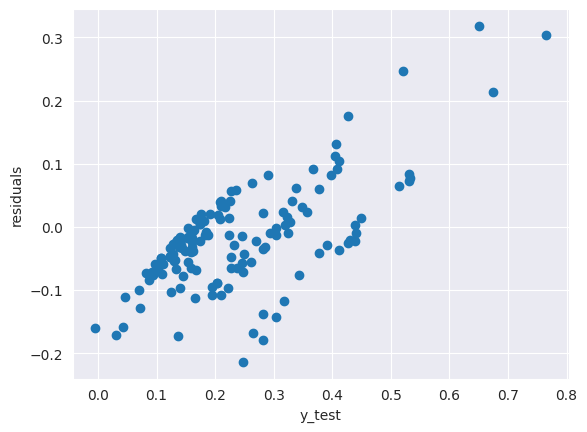

In [48]:
# r2 score is max for lambda 0.01, so will plot with predicted values of lambda = 0.01
# scatter plot of  residuals
lasso = Lasso(alpha=0.01)
lasso.fit(X_seq_lasso, y_train)
y_pred_lasso = lasso.predict(X_test)

residuals_lasso = y_test - y_pred_lasso
plt.scatter(y_test, residuals_lasso)
plt.xlabel('y_test')
plt.ylabel('residuals')
plt.show()


TypeError: 'Text' object is not callable

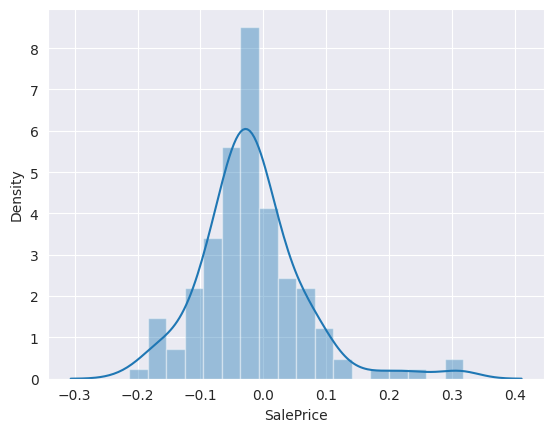

In [49]:
# residual analysis histogram
residuals_lasso = y_test - y_pred_lasso
hist_plt = sns.distplot(residuals_lasso)
hist_plt = hist_plt.title('Residual Analysis histogram')
hist_plt = hist_plt.xlabel('Residuals')
hist_plt = hist_plt.ylabel('Frequency')
hist_plt.show()

In [50]:
# Metrics to give an overall sense of error in the model
rss_lasso = np.sum(np.square(residuals_lasso))
print(rss_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(mse_lasso)
rmse_lasso = mse_lasso**0.5
print(rmse_lasso)



0.9932067508900843
0.007145372308561757
0.0845303040841671
